### TOPIC ANALYSIS OF SONGS FROM 1965-2015

In [4]:
import warnings
warnings.filterwarnings('ignore')

Import Packages/Libraries

In [12]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 

import numpy as np
import pandas as pd


# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

# # Plotting tools
# import pyLDAvis
# import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline
# !pip3 install spacy

In [30]:
df = pd.read_csv("billboard_lyrics_1964-2015.csv", encoding = "ISO-8859-1")
df["Lyrics"] = df["Lyrics"].apply(lambda x: str(x))
text_lyrics = df.Lyrics.values
# text_lyrics = ' '.join(text_lyrics)

In [31]:
lyrics = [[word for word in str(track).lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for track in text_lyrics]

In [34]:
lyrics

[['sam',
  'sham',
  'miscellaneous',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'sam',
  'sham',
  'pharaohs',
  'domingo',
  'samudio',
  'uno',
  'dos',
  'tres',
  'quatro',
  'matty',
  'told',
  'hatty',
  'thing',
  'saw',
  'big',
  'horns',
  'wooly',
  'jaw',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'hatty',
  'told',
  'matty',
  'lets',
  'dont',
  'chance',
  'lets',
  'belseven',
  'come',
  'learn',
  'dance',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'matty',
  'told',
  'hatty',
  'thats',
  'thing',
  'pull',
  'wool',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'wooly',
  'bully',
  'lseven',
  'letter',
  'l',
  'number',
  '7',
  'typed',
  'form',
  'rough',
  'square',
  'l7',
  'lyrics',
  'mean',
  'lets',
  'square'],
 ['sugar',
  'pie',
  'honey',
  'bunch',
  'know',
  'l

In [36]:
import collections

counter = collections.Counter(lyrics[0])
counter.most_common(20)
counts = [(word, count) for word, count in counter.most_common()]
counts

[('wooly', 18),
 ('bully', 17),
 ('matty', 3),
 ('told', 3),
 ('hatty', 3),
 ('lets', 3),
 ('sam', 2),
 ('sham', 2),
 ('thing', 2),
 ('square', 2),
 ('miscellaneous', 1),
 ('pharaohs', 1),
 ('domingo', 1),
 ('samudio', 1),
 ('uno', 1),
 ('dos', 1),
 ('tres', 1),
 ('quatro', 1),
 ('saw', 1),
 ('big', 1),
 ('horns', 1),
 ('jaw', 1),
 ('dont', 1),
 ('chance', 1),
 ('belseven', 1),
 ('come', 1),
 ('learn', 1),
 ('dance', 1),
 ('thats', 1),
 ('pull', 1),
 ('wool', 1),
 ('lseven', 1),
 ('letter', 1),
 ('l', 1),
 ('number', 1),
 ('7', 1),
 ('typed', 1),
 ('form', 1),
 ('rough', 1),
 ('l7', 1),
 ('lyrics', 1),
 ('mean', 1)]

In [49]:
#Set parameters
num_topics = 2 #The number of topics that should be generated
passes = 10
dictionary = corpora.Dictionary(lyrics)
corpus = [dictionary.doc2bow(text) for text in lyrics]

lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

In [54]:
# lyrics

In [51]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=8))

len(corpus)



from operator import itemgetter
lda.get_document_topics(corpus[0],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus[999],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)


[   (   0,
        '0.035*"love" + 0.013*"got" + 0.012*"oh" + 0.012*"like" + 0.012*"come" '
        '+ 0.011*"dont" + 0.010*"baby" + 0.009*"yeah"'),
    (   1,
        '0.019*"baby" + 0.017*"im" + 0.014*"love" + 0.014*"know" + '
        '0.014*"dont" + 0.011*"oh" + 0.009*"time" + 0.008*"youre"')]


[(1, 0.75973964), (0, 0.24026033)]

In [52]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None

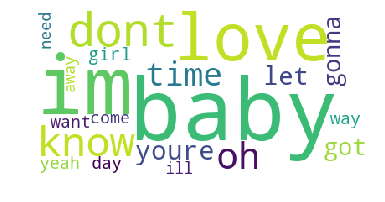

In [53]:
draw_wordcloud(lda,1)